# upsampling
* model_01
* Random_Forest용
* 데이터 양이 불규칙하여 사용

In [1]:
# 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample

In [6]:
# 데이터 로딩
df = pd.read_csv('./MODELING/2011_2020_m2.ver2.csv', encoding='utf-8')

In [7]:
df

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도,남은시간
0,2011-03-04 17:00:00,2.8,8.9,0.3,0.5,1021.0,0.0,0.0
1,2011-03-04 18:00:00,3.4,8.9,0.3,0.4,1021.7,0.0,0.0
2,2011-03-04 19:00:00,4.5,8.9,0.3,0.4,1022.2,0.0,0.0
3,2011-03-04 20:00:00,2.9,8.9,0.3,0.5,1022.6,0.0,0.0
4,2011-03-04 21:00:00,3.8,8.9,0.3,0.5,1023.1,0.0,0.0
...,...,...,...,...,...,...,...,...
72644,2018-10-06 06:00:00,13.6,22.6,2.9,4.1,998.4,2.0,12.0
72645,2018-10-06 07:00:00,14.5,22.6,3.3,4.7,996.3,2.0,11.0
72646,2018-10-06 08:00:00,17.7,23.9,4.7,6.7,993.3,2.0,10.0
72647,2018-10-06 09:00:00,16.8,24.1,3.6,5.1,990.2,2.0,9.0


In [8]:
# 모델1이라서 '남은시간' 제거하기
df = df.drop(['남은시간'], axis=1)
df

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2011-03-04 17:00:00,2.8,8.9,0.3,0.5,1021.0,0.0
1,2011-03-04 18:00:00,3.4,8.9,0.3,0.4,1021.7,0.0
2,2011-03-04 19:00:00,4.5,8.9,0.3,0.4,1022.2,0.0
3,2011-03-04 20:00:00,2.9,8.9,0.3,0.5,1022.6,0.0
4,2011-03-04 21:00:00,3.8,8.9,0.3,0.5,1023.1,0.0
...,...,...,...,...,...,...,...
72644,2018-10-06 06:00:00,13.6,22.6,2.9,4.1,998.4,2.0
72645,2018-10-06 07:00:00,14.5,22.6,3.3,4.7,996.3,2.0
72646,2018-10-06 08:00:00,17.7,23.9,4.7,6.7,993.3,2.0
72647,2018-10-06 09:00:00,16.8,24.1,3.6,5.1,990.2,2.0


In [9]:
print(df["특보강도"].value_counts())

0.0    66503
1.0     5717
2.0      429
Name: 특보강도, dtype: int64


0.0    66503
1.0     5717
2.0      429
Name: 특보강도, dtype: int64


<AxesSubplot: ylabel='Type'>

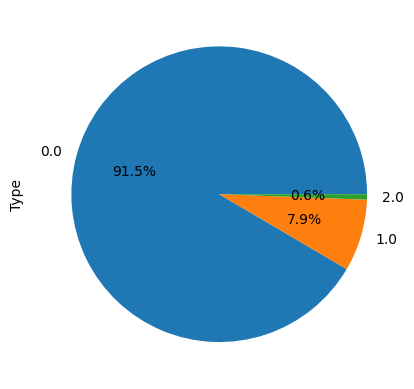

In [10]:
# '특보강도' plot으로 비율 확인
print(df["특보강도"].value_counts())

df.groupby('특보강도').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

* 업샘플링

In [11]:
# 데이터셋 나누기
df_zero = df[df["특보강도"] == 0]
df_one = df[df["특보강도"] == 1]
df_two = df[df["특보강도"] == 2]
print(df_zero.shape)
print(df_one.shape)
print(df_two.shape)

(66503, 7)
(5717, 7)
(429, 7)


In [12]:
# up sampling1
df_upsample = resample(df_one,
             replace=True,
             n_samples=len(df_zero),
             random_state=42)

print(df_upsample.shape)

(66503, 7)


In [13]:
# up sampling2
df_upsample2 = resample(df_two,
             replace=True,
             n_samples=len(df_zero),
             random_state=42)

print(df_upsample.shape)

(66503, 7)


1.0    66503
0.0    66503
2.0    66503
Name: 특보강도, dtype: int64


<AxesSubplot: ylabel='Type'>

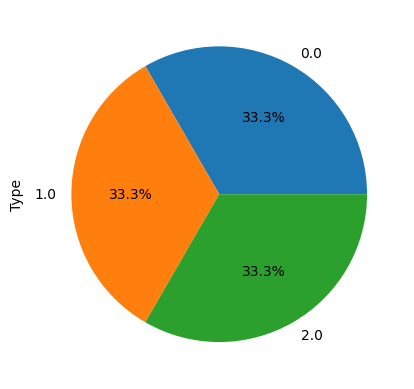

In [14]:
# upsampling 한 데이터 다 합치기
# plot으로 확인
data_upsampled = pd.concat([df_upsample, df_zero, df_upsample2])

print(data_upsampled["특보강도"].value_counts())

data_upsampled.groupby('특보강도').size().plot(kind='pie',
                                       y = "특보강도",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [15]:
data_upsampled

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
8404,2012-08-02 04:00:00,8.5,15.0,0.6,1.0,1007.8,1.0
70039,2018-06-15 18:00:00,8.9,16.0,0.6,0.9,1011.5,1.0
68852,2018-04-24 12:00:00,4.8,13.8,0.5,0.7,1008.0,1.0
68078,2018-03-22 06:00:00,2.4,11.2,1.6,2.2,1011.9,1.0
55136,2018-03-17 08:00:00,4.9,9.4,0.6,0.9,1030.7,1.0
...,...,...,...,...,...,...,...
68034,2018-03-20 10:00:00,14.7,27.1,2.2,3.2,1023.1,2.0
5707,2012-04-03 07:00:00,5.4,17.1,1.1,1.7,992.8,2.0
70463,2018-07-03 20:00:00,15.8,27.5,2.3,3.4,988.0,2.0
68033,2018-03-20 09:00:00,13.5,25.3,2.0,2.9,1022.3,2.0


In [17]:
print(data_upsampled["특보강도"].value_counts())

1.0    66503
0.0    66503
2.0    66503
Name: 특보강도, dtype: int64


In [18]:
# obj -> datetime
data_upsampled['일시'] = pd.to_datetime(data_upsampled['일시'])
data_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199509 entries, 8404 to 61662
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   일시          199509 non-null  datetime64[ns]
 1   WIND_SPEED  199509 non-null  float64       
 2   GUST_WIND   199509 non-null  float64       
 3   SIG_WAVE    199509 non-null  float64       
 4   MAX_WAVE    199509 non-null  float64       
 5   HPA         199509 non-null  float64       
 6   특보강도        199509 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 12.2 MB


In [19]:
# 인덱스
data_upsampled = data_upsampled.set_index('일시')
data_upsampled

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2012-08-02 04:00:00,8.5,15.0,0.6,1.0,1007.8,1.0
2018-06-15 18:00:00,8.9,16.0,0.6,0.9,1011.5,1.0
2018-04-24 12:00:00,4.8,13.8,0.5,0.7,1008.0,1.0
2018-03-22 06:00:00,2.4,11.2,1.6,2.2,1011.9,1.0
2018-03-17 08:00:00,4.9,9.4,0.6,0.9,1030.7,1.0
...,...,...,...,...,...,...
2018-03-20 10:00:00,14.7,27.1,2.2,3.2,1023.1,2.0
2012-04-03 07:00:00,5.4,17.1,1.1,1.7,992.8,2.0
2018-07-03 20:00:00,15.8,27.5,2.3,3.4,988.0,2.0


* 저장

In [20]:
data_upsampled.to_csv('model_01_last.csv')

### upsampling을 쓴 이유
- 특보강도의 발생 비율의 편차로 인한 회귀 모델 및 분류모델의 예측을 해결
- 데이터 불균형 문제 해결 방안
- 샘플 수를 동일하게 만드는 방법
- 이 방법을 썼을때 데이터 세트에서 정확도가 오른 것을 확인.